In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import *
import csv
# from keras.lay
import time

In [107]:
data = pd.read_csv("Train_dataset.csv")

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population [2011]  739 non-null    object 
 4   Popuation [2001]   295 non-null    object 
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                783 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  # of hospitals     772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    int64  
dtypes: float64(9), int64(1), o

In [109]:
data.dtypes

City                  object
State                 object
Type                  object
Population [2011]     object
Popuation [2001]      object
Sex Ratio            float64
Median Age           float64
Avg Temp             float64
SWM                   object
Toilets Avl          float64
Water Purity         float64
H Index              float64
Female Population    float64
# of hospitals       float64
Foreign Visitors     float64
Covid Cases            int64
dtype: object

In [110]:
data

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,"1,24,42,373","1,19,78,450",878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,"1,10,07,835","98,79,172",858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,"84,36,675","43,01,326",936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,"68,09,970","36,37,483",930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,"55,70,585","35,20,085",852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,Lunawada,Gujarat,M,"36,954",NaN,846.0,23.0,28.0,MEDIUM,68.0,103.0,0.035280,31263.0,19.0,284973.0,1944
783,Murshidabad,West Bengal,M,"36,947",NaN,945.0,23.0,36.0,MEDIUM,62.0,136.0,0.056394,34915.0,22.0,1489500.0,2172
784,Mahe,Puducherry,M,"36,828",NaN,1019.0,28.0,28.0,HIGH,98.0,138.0,0.066752,37528.0,27.0,106153.0,2851
785,Lanka,Assam,M.B,"36,805",NaN,900.0,24.0,6.0,MEDIUM,63.0,145.0,0.627556,33125.0,15.0,24720.0,2158


In [111]:
obj_df = data.select_dtypes(include=['object'])
obj_df.dtypes

City                 object
State                object
Type                 object
Population [2011]    object
Popuation [2001]     object
SWM                  object
dtype: object

In [112]:
la = LabelEncoder()
data["SWM"] = la.fit_transform(obj_df["SWM"].astype(str))
data["Type"] = la.fit_transform(obj_df["Type"].astype(str))
data["Popuation [2001]"] = la.fit_transform(obj_df["Popuation [2001]"].astype(str))
data["Population [2011]"] = la.fit_transform(obj_df["Population [2011]"].astype(str))


In [113]:
type(data["Popuation [2001]"][0])

numpy.int64

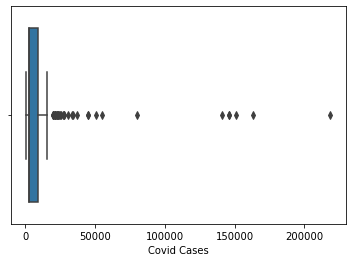

In [114]:
sn.boxplot(data["Covid Cases"])

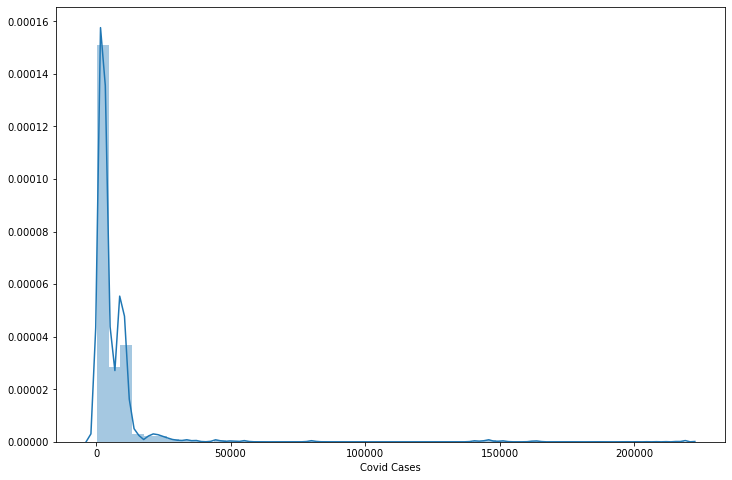

In [115]:
fig,ax = plt.subplots(figsize = (12,8))
sn.distplot(data["Covid Cases"])


In [116]:
data = data.fillna(data.median())

In [117]:
cor = data.corr()

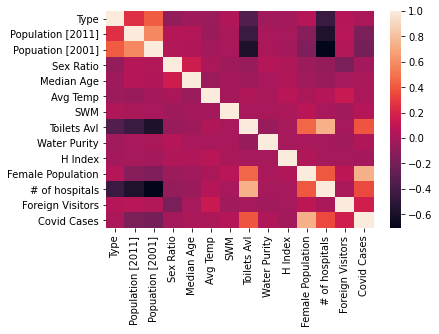

In [118]:
sn.heatmap(cor)
plt.show()

In [193]:
data = data.drop(["Popuation [2001]"],axis = 1)

In [194]:
data

,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,0.226598,-1.632504,-0.753532,-1.521925,0.153381,1.227775,4.097152,-0.011494,0.757803,14.021986,4.066954,1.917839,10.358637
1,0.226598,-1.668577,-1.297271,0.392951,-0.136789,1.227775,3.963963,1.759146,1.583174,12.077582,3.685940,0.639401,4.869728
2,0.871174,1.343467,0.823313,0.871670,0.878804,-1.187872,3.864072,-1.859118,-1.510136,10.043410,2.819998,-0.458219,8.894853
3,0.871174,0.978234,0.660191,-1.521925,0.008296,1.227775,4.030558,-1.243243,1.236326,7.988919,2.369709,-0.779710,3.210685
4,0.871174,0.468712,-1.460393,1.350389,-0.862212,0.019951,4.363529,-1.589673,1.312245,5.903315,1.088115,-0.679630,1.759874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,-0.203119,-0.658550,-1.623515,-1.521925,-0.426958,1.227775,-0.930711,-1.820626,-1.742453,-0.292360,-0.782318,-0.679630,-0.309215
783,-0.203119,-0.663059,1.067996,-1.521925,0.733719,1.227775,-1.130494,-0.550384,-1.663091,-0.287561,-0.678405,0.079042,-0.294123
784,-0.203119,-0.667568,3.079832,0.871670,-0.426958,-1.187872,0.068202,-0.473400,-1.624154,-0.284127,-0.505217,-0.792260,-0.249181
785,0.011739,-0.672077,-0.155418,-1.043206,-3.618822,1.227775,-1.097197,-0.203955,0.483841,-0.289913,-0.920869,-0.843550,-0.295050


In [195]:
Y_train = np.array(data["Covid Cases"])

In [196]:
X_train = np.array(data.loc[:,"Sex Ratio":"Foreign Visitors"])

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.4, random_state=0)

In [198]:
regr = make_pipeline(StandardScaler(), SVR(C=11.0, epsilon=0.2))

In [199]:
regr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=11.0, epsilon=0.2))])

In [200]:
regr.score(X_test,y_test)

0.5712828628249441

In [201]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [202]:
lr.score(X_test,y_test)

0.6155710632529974

In [203]:
mu = data.loc[:,"Type":].mean(axis =0)

In [122]:
sigma = data.loc[:,"Type":].std(axis = 0)

In [123]:
data = (data.loc[:,"Type":]-mu)/sigma

In [1075]:
X_train

array([[-1.93842880e-02,  3.90977287e-01,  5.88818247e-01, ...,
         4.61477228e-16, -9.32021996e-01, -7.79123178e-01],
       [ 1.17684322e+00,  1.34849810e+00,  1.31424233e+00, ...,
        -3.07012606e-01, -6.89034401e-01,  2.01503311e-02],
       [ 1.98111622e-01,  8.69737692e-01, -2.81690650e-01, ...,
        -3.21713980e-01, -5.15471834e-01, -6.61937104e-01],
       ...,
       [-9.16554917e-01, -8.77831171e-02,  1.31424233e+00, ...,
        -3.27106422e-01, -6.54321888e-01, -7.76241276e-01],
       [ 9.04973330e-01, -5.66543522e-01,  1.02407270e+00, ...,
        -3.15125714e-01, -7.58459428e-01, -8.88245291e-01],
       [ 1.77495697e+00,  1.82725850e+00, -1.36605833e-01, ...,
        -3.27276876e-01, -1.07087205e+00, -3.06814978e-01]])

# MULTI VARIATE REGRESSION

In [132]:
def hypothesis(x, theta):
    y_pred = 0.0
    for i in range(theta.shape[0]):
        y_pred += theta[i]*x[i]
        
    return y_pred

In [133]:
def error(X,Y,theta):
    m = X.shape[0]
    e = 0.0
    for i in range(m):
        hx = hypothesis(X[i],theta)
        e+=(hx-Y[i])**2
        
    return e/m

In [134]:
def gradient(X,Y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            hx = hypothesis(X[i], theta)
            grad[j] += (hx - Y[i])*X[i][j]
            
    return grad/m

In [135]:
def gradient_descent(X,Y, lr = .1,max_itr = 300):
    m,n = X.shape
    error_list = []
    theta = np.zeros((n,))
    for i in range(max_itr):

        e = error(X,Y,theta)

        grad = gradient(X,Y, theta)
        error_list.append(e)
        for j in range(n):
            theta[j] = theta[j] - lr*grad[j]
            
    return theta, error_list

In [136]:
ones = np.ones((X_train.shape[0], 1))
X_ = np.hstack((ones, X_train))
X_.shape

(472, 11)

In [138]:
start = time.time()
theta, error_list = gradient_descent(X_, y_train)
end = time.time()

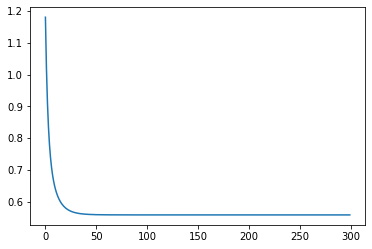

In [139]:
plt.plot(error_list)


In [140]:
y_pred = []
for i in range(X_.shape[0]):
    y_pred.append(hypothesis(X_[i],theta))

In [141]:
def evaluate(Y_actual, Y_pred):
    num = np.sum((Y_actual - Y_pred)**2)
    denom = np.sum((Y_actual - Y_actual.mean())**2)
    
    return (1 - (num/denom))*100

In [142]:
evaluate(y_train,y_pred)


52.62793916648547

In [143]:
r2_score(y_train,y_pred)

0.5262793916648547

In [150]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [153]:
y_pred = rf.predict(X_train)

In [154]:
r2_score(y_pred,y_train)

0.9166808111556252

In [157]:
mlp = MLPRegressor(hidden_layer_sizes=(5,),max_iter=1000000)
mlp.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(5,), max_iter=1000000)

In [158]:
mlp.score(X_test,y_test)

0.6424781406844079

In [161]:
y_pred = mlp.predict(X_test)

In [162]:
r2_score(y_pred,y_test)

0.7089692166678583

In [167]:
VotingRegressor?

In [169]:
estimators = [('mlp',mlp),('lr',lr),('rf',rf),('SVM',regr)]
vr = VotingRegressor(estimators)

In [999]:
vr?

In [170]:
vr.fit(X_train,y_train)

VotingRegressor(estimators=[('mlp',
                             MLPRegressor(hidden_layer_sizes=(5,),
                                          max_iter=1000000)),
                            ('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(n_estimators=500)),
                            ('SVM',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr',
                                              SVR(C=11.0, epsilon=0.2))]))])

In [171]:
vr.score(X_train,y_train)

0.8448112403778321

In [177]:
r2_score(y_pred,y_test)

0.6662302158627653

In [182]:
y_pred = vr.predict(X_test)

In [204]:
test = pd.read_csv("Test_data-Table 1.csv")

In [205]:
obj_df_t = test.select_dtypes(include=['object'])
obj_df_t.dtypes

City                 object
State                object
Type                 object
Population [2011]    object
SWM                  object
dtype: object

In [206]:
test["SWM"] = la.fit_transform(obj_df_t["SWM"].astype(str))
test["Type"] = la.fit_transform(obj_df_t["Type"].astype(str))
test["Population [2011]"] = la.fit_transform(obj_df_t["Population [2011]"].astype(str))

In [212]:
test = test.fillna(test.median())

In [213]:
X_test = np.array(test.loc[:,"Sex Ratio":"Foreign Visitors"])


In [241]:
sep1 = vr.predict(X_test)
for i in range(len(sep1)):
    if(sep1[i]<0):
        sep1[i] = sep1[i]*-1

In [242]:
city = np.array(test["City"])

In [246]:
final_sep1 = []
for i in range(len(test)):
    req = {"City":city[i],
          "Covid_Case":int(sep1[i])
          }
    final_sep1.append(req)

In [247]:
len(final_sep1)

501

In [253]:
with open('sep1.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=["City","Covid_Case"])
    writer.writeheader()
    writer.writerows(final_sep1)

In [257]:
test = pd.read_csv("Test_data-Table 1.csv")
test = test.fillna(test.median())

In [258]:
obj_df_t = test.select_dtypes(include=['object'])
obj_df_t.dtypes

City                 object
State                object
Type                 object
Population [2011]    object
SWM                  object
dtype: object

In [259]:
test["SWM"] = la.fit_transform(obj_df_t["SWM"].astype(str))
test["Type"] = la.fit_transform(obj_df_t["Type"].astype(str))
test["Population [2011]"] = la.fit_transform(obj_df_t["Population [2011]"].astype(str))

In [ ]:
X_test = np.array(test.loc[:,"Sex Ratio":"Foreign Visitors"])


In [260]:
oct1 = vr.predict(X_test)

In [261]:
final_oct1 = []
for i in range(len(test)):
    req = {"City":city[i],
          "Covid_Case":int(oct1[i])
          }
    final_oct1.append(req)

In [262]:
with open('oct1.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=["City","Covid_Case"])
    writer.writeheader()
    writer.writerows(final_oct1)